### Predicting Fraudulent Transactions for a Financial Company 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Fraud.csv')
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


### Data Preprocessing
#### 1. Data cleaning including missing values, outliers and multi-collinearity.  


In [7]:
data.isnull().value_counts()

step   type   amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud
False  False  False   False     False          False           False     False           False           False    False             6362620
Name: count, dtype: int64

In [8]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

<Axes: xlabel='count', ylabel='type'>

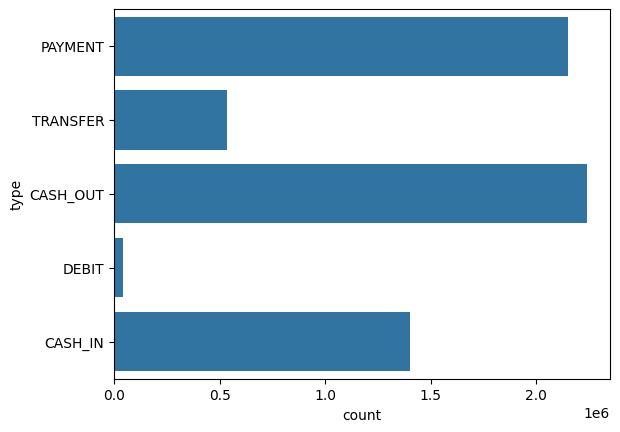

In [10]:
sns.countplot(data.type)

### Exploratory Data Analysis

In [11]:
data.describe(include=['object'])

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1677795071,C1286084959
freq,2237500,3,113


In [12]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data.type=label.fit_transform(data.type)
data.nameOrig=label.fit_transform(data.nameOrig)
data.nameDest=label.fit_transform(data.nameDest)

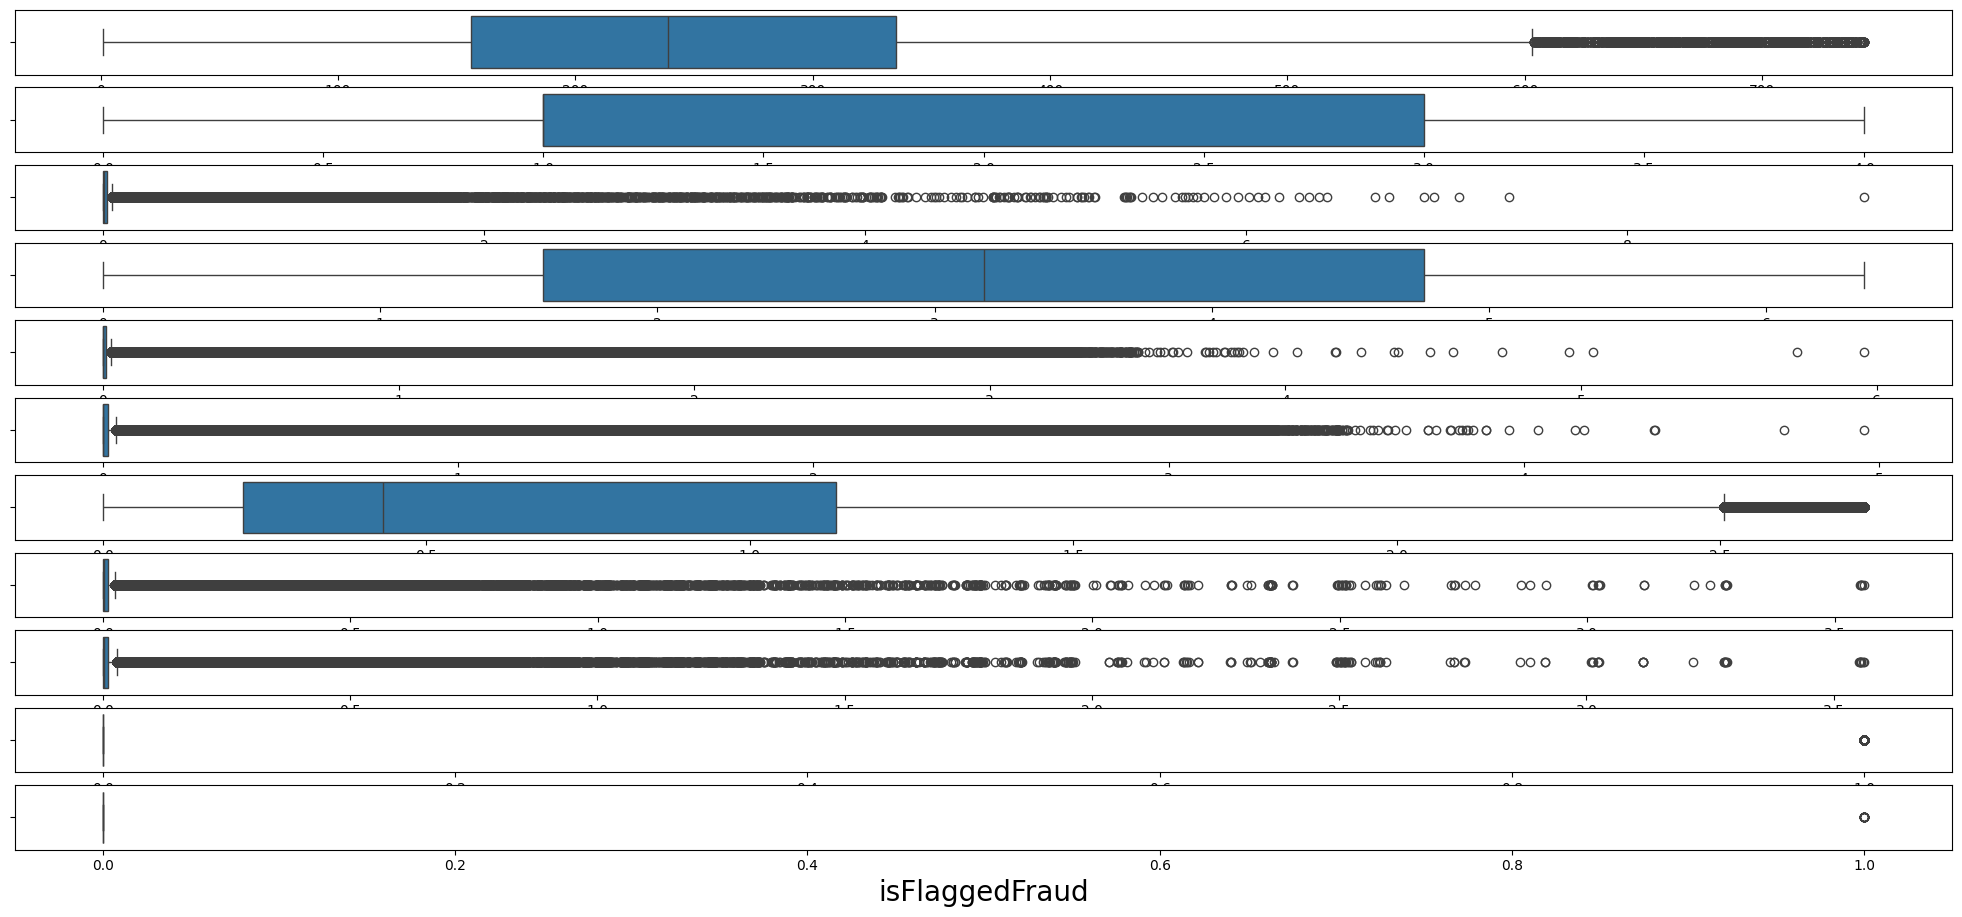

In [13]:
box=data[['step', 'type', 'amount', 'nameOrig', 
          'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']]
plt.figure(figsize=(25,25), facecolor='white')
plotnumber = 1

for column in box:
    if plotnumber<=25 :     
        ax = plt.subplot(25,1,plotnumber)
        sns.boxplot(x=box[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

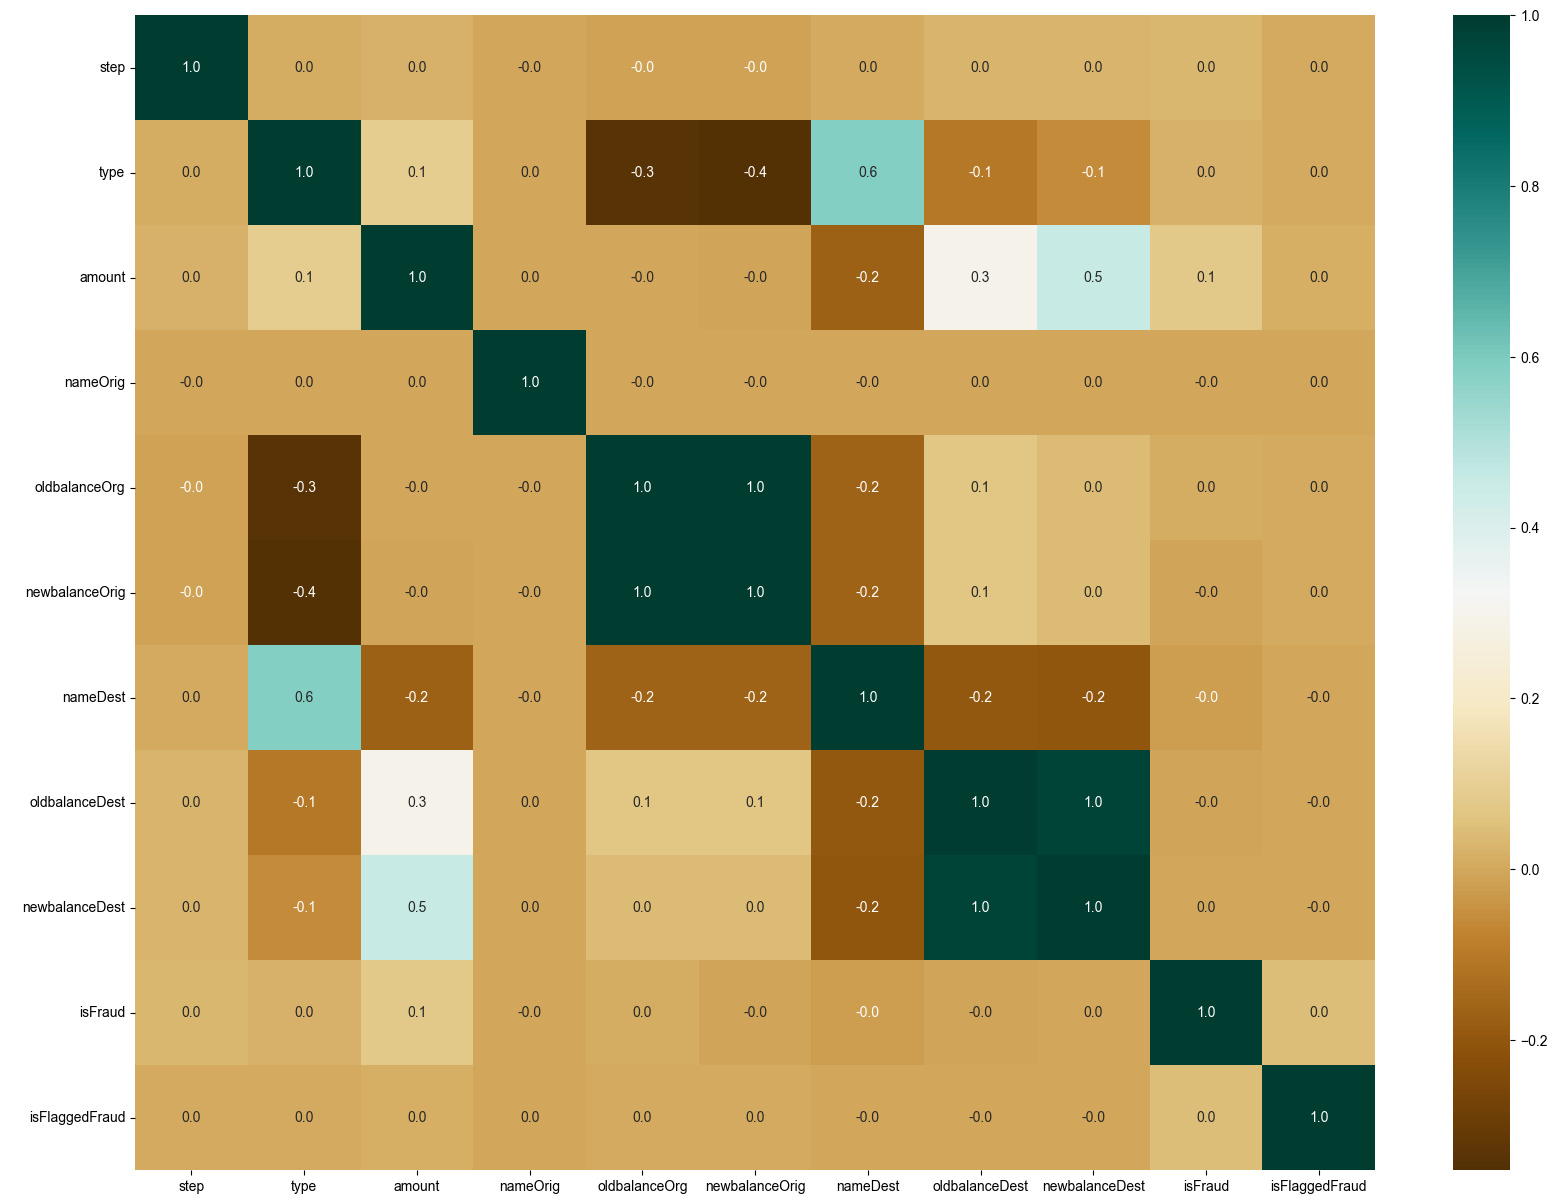

In [14]:
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, fmt= '.1f', cmap="BrBG")
sns.set(font_scale=2.25)
plt.show() 

In [15]:
corr_matrix = data.corr()
corr_matrix["isFlaggedFraud"].sort_values(ascending=False)

isFlaggedFraud    1.000000
isFraud           0.044109
amount            0.012295
oldbalanceOrg     0.003835
newbalanceOrig    0.003776
step              0.003277
type              0.002685
nameOrig          0.000667
oldbalanceDest   -0.000513
newbalanceDest   -0.000529
nameDest         -0.001122
Name: isFlaggedFraud, dtype: float64

#### 3. How did you select variables to be included in the model?

checking correlation btw target variable with remaining variable

#### 5. What are the key factors that predict fraudulent customer?
key factors that predict fraudulent customer are isFraud and amount

#### 6. Do these factors make sense? If yes, How? If not, How not?
yes,they make sense,if the amount is more we can assume it may be fraud and if isfraud is 1, the chances of its isFlaggedFraud is more.

## Model Building

In [16]:
dataflagfraud= data.loc[data.isFlaggedFraud == 1]
dataflagfraud.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,4,4953893.08,5462026,4953893.08,4953893.08,465112,0.0,0.0,1,1
3247297,250,4,1343002.08,329539,1343002.08,1343002.08,43638,0.0,0.0,1,1
3760288,279,4,536624.41,116746,536624.41,536624.41,29788,0.0,0.0,1,1
5563713,387,4,4892193.09,6052892,4892193.09,4892193.09,540034,0.0,0.0,1,1
5996407,425,4,10000000.00,5332564,19585040.37,19585040.37,116289,0.0,0.0,1,1
5996409,425,4,9585040.37,4552191,19585040.37,19585040.37,32302,0.0,0.0,1,1
6168499,554,4,3576297.10,3078566,3576297.10,3576297.10,419584,0.0,0.0,1,1
6205439,586,4,353874.22,2248279,353874.22,353874.22,227867,0.0,0.0,1,1
6266413,617,4,2542664.27,5651751,2542664.27,2542664.27,471714,0.0,0.0,1,1
6281482,646,4,10000000.00,2958273,10399045.08,10399045.08,238527,0.0,0.0,1,1


In [17]:
X = data.loc[:,['isFraud','amount','oldbalanceOrg','newbalanceOrig','step','type','nameOrig']]
y = data.isFlaggedFraud

In [18]:
X.head()

,isFraud,amount,oldbalanceOrg,newbalanceOrig,step,type,nameOrig
0,0,9839.64,170136.0,160296.36,1,3,757869
1,0,1864.28,21249.0,19384.72,1,3,2188998
2,1,181.00,181.0,0.00,1,4,1002156
3,1,181.00,181.0,0.00,1,1,5828262
4,0,11668.14,41554.0,29885.86,1,3,3445981


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: isFlaggedFraud, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Splitting the data into test and train for calculating accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4453834, 7), (1908786, 7), (4453834,), (1908786,))

In [22]:
from scipy.stats import skew
from scipy.stats import kurtosis

isFraud
769.7023761366951


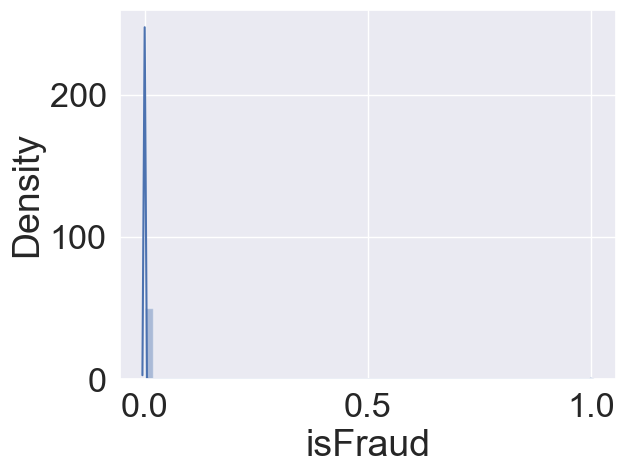

amount
1797.9552914598337


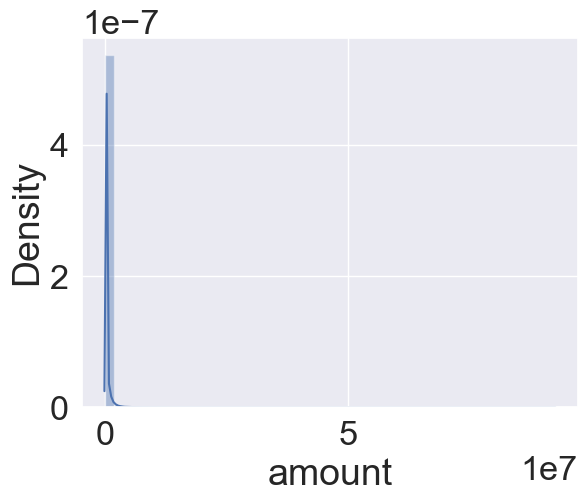

oldbalanceOrg
32.9648516960387


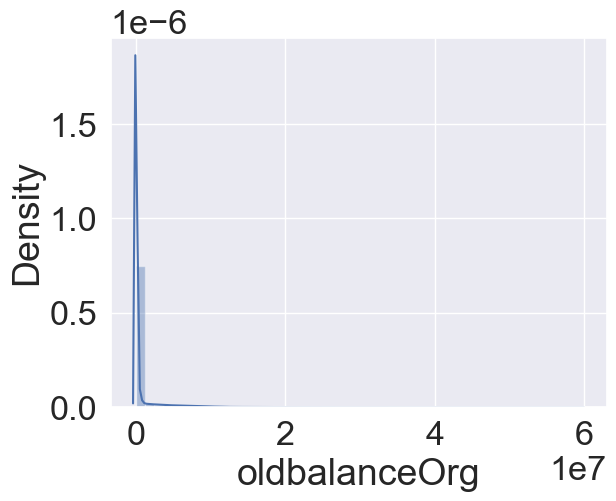

newbalanceOrig
32.06695841776864


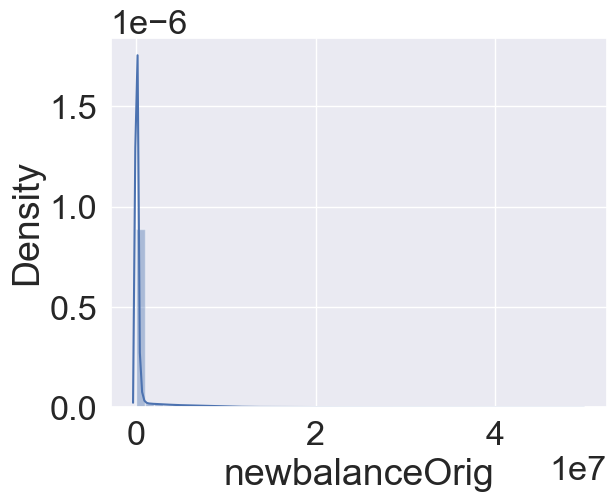

step
0.3290693534211582


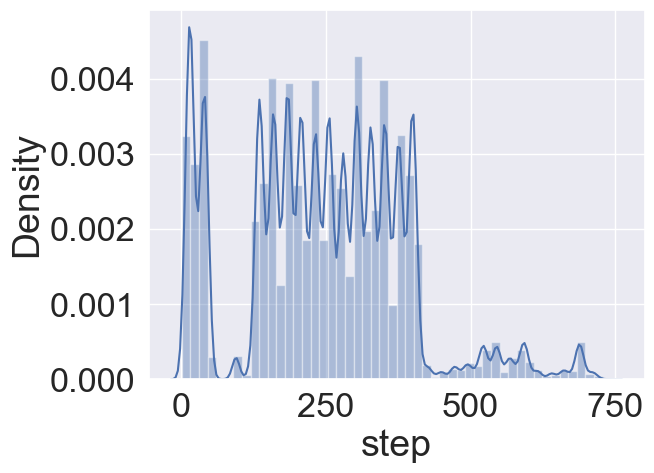

type
-1.4345763413580779


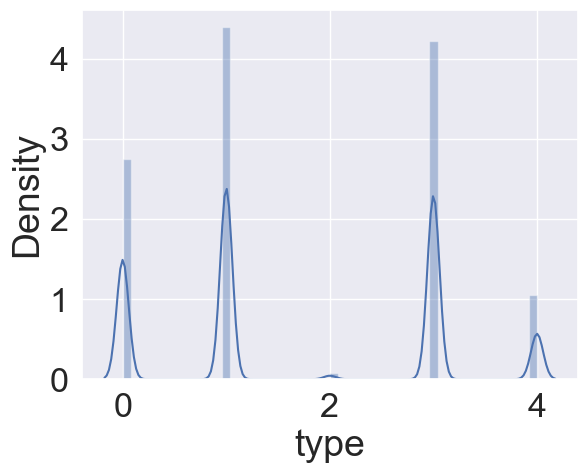

nameOrig
-1.2000279621839782


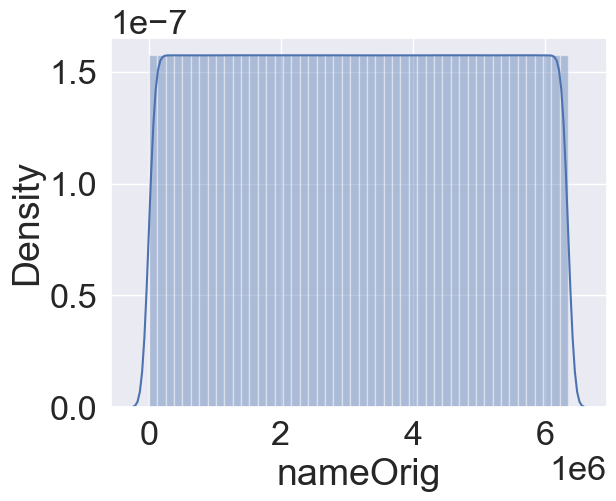

In [24]:
for col in X_train:
    print(col)
    print(kurtosis(data[col]))
    
    plt.figure()
    sns.distplot(data[col])
    plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### 2. Describe your fraud detection model in elaboration.

In [27]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(max_depth=15)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15)

In [28]:
dtree.score(X_test, y_test)

0.7142846664954787

In [30]:
p_test = dtree.predict(X_test)
p_test

array([0., 0., 0., ..., 0., 0., 0.])

#### 7. What kind of prevention should be adopted while company update its infrastructure?
Set limit to amount transaction, if it extends the limit the person should contact company to verify.

#### 8. Assuming these actions have been implemented, how would you determine if they work?
if these actions are implemented,I feel it will work better than current situation.

### Thank You